<a href="https://colab.research.google.com/github/melikaminari/DataJournalism/blob/main/%CF%83%CF%85%CE%B3%CE%BA%CF%81%CE%B9%CF%83%CE%B7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!python -m spacy download el_core_news_sm

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
!pip install matplotlib-venn

In [27]:
nlp = spacy.load('el_core_news_sm')

In [28]:
newsit2022_full_articles_df = pd.read_csv('/content/gdrive/MyDrive/2o scraper.ipynb.csv')
newsit2022_full_articles_df

,site,url,section,title,date,author,full_text,datetime
0,https://www.newsit.gr/,https://www.newsit.gr/megales-epixeiriseis/Mag...,\nNewsIT Μεγαλες Επιχειρησεις Magma Resort: Ντ...,Magma Resort: Ντεμπούτο στα ελληνικά νησιά από...,2022-08-31T14:26:54+03:00,NaN,Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...,2022-08-31 14:26:54+03:00
1,https://www.newsit.gr/,https://www.newsit.gr/ellada/kikilias-o-touris...,\nNewsIT Ελλαδα Κικιλιας: Ο τουρισμος στην Αθη...,Κικίλιας: Ο τουρισμός στην Αθήνα φέρνει ρεκόρ ...,2022-08-31T11:48:30+03:00,NaN,«Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ...,2022-08-31 11:48:30+03:00
2,https://www.newsit.gr/,https://www.newsit.gr/topikes-eidhseis/kyklade...,\nNewsIT Τοπικα Νεα Κυκλαδες: Αυτο ειναι το νη...,Κυκλάδες: Αυτό είναι το νησί που μπήκε στη λίσ...,2022-08-29T11:23:39+03:00,NaN,Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και...,2022-08-29 11:23:39+03:00
3,https://www.newsit.gr/,https://www.newsit.gr/megales-epixeiriseis/nea...,\nNewsIT Μεγαλες Επιχειρησεις Νεα τουριστικη ε...,Νέα τουριστική επένδυση: Ξενοδοχείο στα Χανιά ...,2022-08-26T15:30:00+03:00,NaN,Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο...,2022-08-26 15:30:00+03:00
4,https://www.newsit.gr/,https://www.newsit.gr/topikes-eidhseis/tourism...,\nNewsIT Τοπικα Νεα Τουρισμος: Αλλαγες στο προ...,Τουρισμός: Αλλαγές στο προφίλ των επισκεπτών σ...,2022-08-26T11:34:08+03:00,NaN,Αλλαγές στο προφίλ των τουριστών που επισκέπτο...,2022-08-26 11:34:08+03:00
...,...,...,...,...,...,...,...,...
115,https://www.newsit.gr/,https://www.newsit.gr/oikonomia/EBRD-anaptyksi...,\nNewsIT Οικονομια EBRD: Αναπτυξη 7% της ελλην...,EBRD: Ανάπτυξη 7% της ελληνικής οικονομίας φέτ...,2021-11-04T13:21:57+02:00,NaN,Αισιόδοξη πρόβλεψη από την EBRD (Ευρωπαϊκή Τρά...,2021-11-04 13:21:57+02:00
116,https://www.newsit.gr/,https://www.newsit.gr/politikh/vasilis-kikilia...,\nNewsIT Πολιτικη Βασιλης Κικιλιας για τουρισμ...,Βασίλης Κικίλιας για τουρισμό στο sky news: Τώ...,2021-11-03T18:41:53+02:00,NaN,"Με σκληρή δουλειά τώρα, αναμένουμε την ολική ε...",2021-11-03 18:41:53+02:00
117,https://www.newsit.gr/,https://www.newsit.gr/oikonomia/i-ellada-koryf...,\nNewsIT Οικονομια Η Ελλαδα κορυφαιος τουριστι...,Η Ελλάδα κορυφαίος τουριστικός προορισμός για ...,2021-10-25T11:30:00+03:00,NaN,Ως ο κορυφαίος προορισμός για την Ευρώπη το 20...,2021-10-25 11:30:00+03:00
118,https://www.newsit.gr/,https://www.newsit.gr/kosmos/nisi-tou-pasxa-ox...,\nNewsIT Κοσμος Νησι του Πασχα: «Οχι» στο ανοι...,Νησί του Πάσχα: «Όχι» στο άνοιγμα του τουρισμο...,2021-10-25T09:35:26+03:00,NaN,Το νησί του Πάσχα θα παραμείνει κλειστό προς τ...,2021-10-25 09:35:26+03:00


In [29]:
newsit2023_full_articles_df = pd.read_csv('/content/gdrive/MyDrive/1o scraper.ipynb.csv')
newsit2023_full_articles_df

,site,url,section,title,date,author,full_text
0,https://www.newsit.gr/,https://www.newsit.gr/topikes-eidhseis/samos-s...,\nNewsIT Τοπικα Νεα Το νησι - εκπληξη που βρισ...,Σάμος: Στους πέντε κορυφαίους προορισμούς της ...,2023-07-10T09:09:03+03:00,NaN,Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ...
1,https://www.newsit.gr/,https://www.newsit.gr/topikes-eidhseis/aktoplo...,\nNewsIT Τοπικα Νεα Αυξησεις «φωτια» στα ακτοπ...,Ακτοπλοϊκά εισιτήρια: Οι αυξήσεις και τα νησιά...,2023-07-09T20:30:07+03:00,NaN,Τα ακτοπλοϊκά εισιτήρια είναι «φωτιά» και όπως...
2,https://www.newsit.gr/,https://www.newsit.gr/topikes-eidhseis/tinos-o...,\nNewsIT Τοπικα Νεα Αυτο ειναι το νησι των Κυκ...,Τήνος: Ο τουρισμός και η συνταγή της απογείωση...,2023-07-09T13:20:41+03:00,NaN,Η Τήνος δίνει τη δική της μάχη και ο τουρισμός...
3,https://www.newsit.gr/,https://www.newsit.gr/ellada/ayksimeni-i-touri...,\nNewsIT Ελλαδα Αυξημενη η τουριστικη κινηση σ...,"Αυξημένη η τουριστική κίνηση στα νησιά, «βραχν...",2023-07-09T09:48:30+03:00,NaN,«Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα ...
4,https://www.newsit.gr/,https://www.newsit.gr/topikes-eidhseis/tourism...,\nNewsIT Τοπικα Νεα Δειτε τα ελληνικα νησια πο...,Τουρισμός: Ποια νησιά επέλεξαν 27.000 Τούρκοι ...,2023-07-08T16:38:30+03:00,NaN,Ο τουρισμός δίνει ανάσες στις τοπικές αγορές μ...
...,...,...,...,...,...,...,...
95,https://www.newsit.gr/,https://www.newsit.gr/politikh/kikilias-o-kaly...,\nNewsIT Πολιτικη Κικιλιας: Ο καλυτερος Οκτωβρ...,Κικίλιας: Ο καλύτερος Οκτώβριος όλων των εποχώ...,2022-12-21T15:39:07+02:00,NaN,Ο τουρισμός αποτελεί ένα σημαντικό κομμάτι της...
96,https://www.newsit.gr/,https://www.newsit.gr/politikh/kyriakos-mitsot...,\nNewsIT Πολιτικη Κυριακος Μητσοτακης για τουρ...,Κυριάκος Μητσοτάκης για τουρισμό: «Είχαμε 3 δι...,2022-12-20T18:27:16+02:00,NaN,Ο Κυριάκος Μητσοτάκης μίλησε στην εκδήλωση που...
97,https://www.newsit.gr/,https://www.newsit.gr/politikh/vasilis-kikilia...,\nNewsIT Πολιτικη Βασιλης Κικιλιας: Εστιαση κα...,Βασίλης Κικίλιας: Εστίαση και καταλύματα ενισχ...,2022-12-20T16:51:11+02:00,NaN,Τα στοιχεία της ΕΛΣΤΑΤ σχολίασε με ανάρτησή το...
98,https://www.newsit.gr/,https://www.newsit.gr/politikh/proypologismos-...,"\nNewsIT Πολιτικη Κικιλιας: Και το 2023, ο του...","Προϋπολογισμός 2023 – Κικίλιας: Και το 2023, ο...",2022-12-16T13:20:29+02:00,NaN,Σε πρωταγωνιστή της ανάπτυξης θα αναδειχθεί κα...


In [30]:
newsit2022_full_articles = newsit2022_full_articles_df['full_text'].str.cat(sep = ' ')
newsit2022_full_articles[:665]

'Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνει η αμερικανική πολυεθνική εταιρεία φιλοξενίας\xa0Hyatt\xa0με παρουσία σε όλον τον κόσμο. Το\xa0Magna\xa0Resort\xa0Santorini, υπό τη διαχείριση της SWOT Hospitality που άνοιξε στη Σαντορίνη, αποτελεί το πρώτο πολυτελές θέρετρο με το εμπορικό σήμα της Hyatt στα ελληνικά νησιά. H\xa0δε, σύνδεση του με τη συλλογή Unbound Collection by Hyatt, υπογραμμίζει τη στρατηγική στόχευση της Hyatt στην ανάπτυξη των ανεξάρτητων εμπορικών σημάτων της σε σημαντικούς, παγκόσμιους, δημοφιλείς προορισμούς.\xa0 \xa0To\xa0πολυτελές ξενοδοχείο\xa0Magna\xa0Resort\xa0Santorini\xa0διαθέτει 59 δωμάτια και βρίσκεται ανάμεσα στις κορυφές των λόφων του Βουρβούλου.   Όπως ανέφερε '

In [31]:
newsit2023_full_articles = newsit2023_full_articles_df['full_text'].str.cat(sep = ' ')
newsit2022_full_articles[:665]

'Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνει η αμερικανική πολυεθνική εταιρεία φιλοξενίας\xa0Hyatt\xa0με παρουσία σε όλον τον κόσμο. Το\xa0Magna\xa0Resort\xa0Santorini, υπό τη διαχείριση της SWOT Hospitality που άνοιξε στη Σαντορίνη, αποτελεί το πρώτο πολυτελές θέρετρο με το εμπορικό σήμα της Hyatt στα ελληνικά νησιά. H\xa0δε, σύνδεση του με τη συλλογή Unbound Collection by Hyatt, υπογραμμίζει τη στρατηγική στόχευση της Hyatt στην ανάπτυξη των ανεξάρτητων εμπορικών σημάτων της σε σημαντικούς, παγκόσμιους, δημοφιλείς προορισμούς.\xa0 \xa0To\xa0πολυτελές ξενοδοχείο\xa0Magna\xa0Resort\xa0Santorini\xa0διαθέτει 59 δωμάτια και βρίσκεται ανάμεσα στις κορυφές των λόφων του Βουρβούλου.   Όπως ανέφερε '

In [38]:

two_sites_list = []
newsitD2022= {'site' : 'newsit.gr2022', 'full_text' : newsit2022_full_articles}
two_sites_list.append(newsitD2022)
newsitD2023 = {'site' : 'newsit.gr2023', 'full_text' : newsit2023_full_articles}
two_sites_list.append(newsitD2023)
two_sites_df = pd.DataFrame(two_sites_list)
two_sites_df


,site,full_text
0,newsit.gr2022,Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...
1,newsit.gr2023,Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ...


In [39]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['full_text'])

In [40]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
print("cosine scores ==> ", arr)

cosine scores ==>  [[1.         0.90208389]
 [0.90208389 1.        ]]


([<matplotlib.axis.YTick at 0x7ce24c6c8730>,
 [Text(0, 0, 'newsit.gr2022'), Text(0, 1, 'newsit.gr2023')])

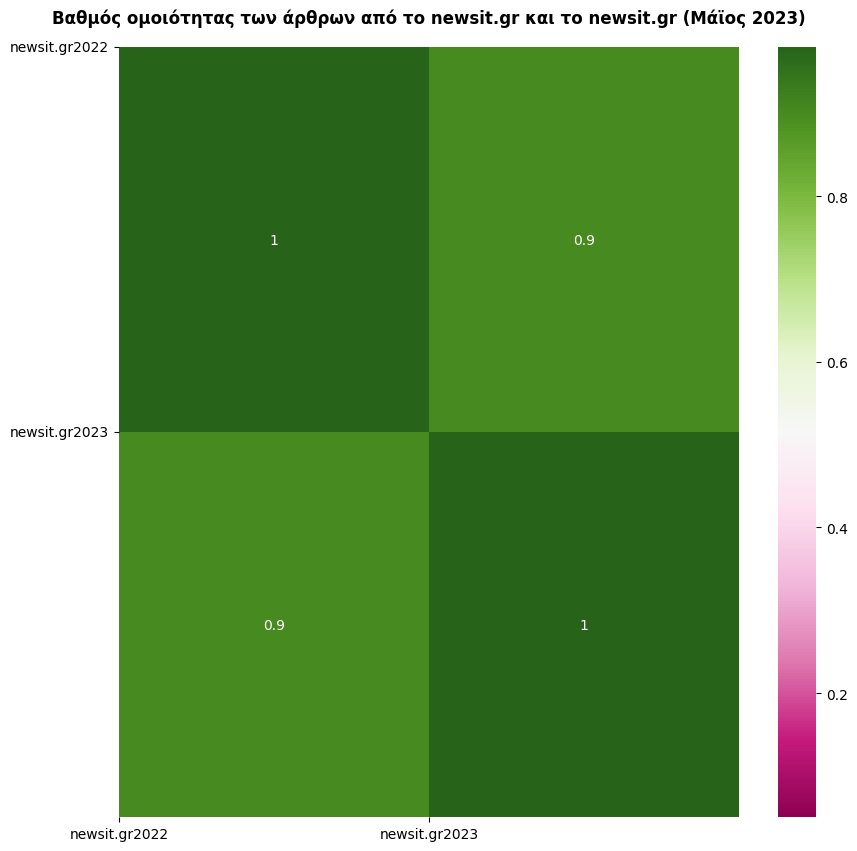

In [42]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το newsit.gr και το newsit.gr (Μάϊος 2023)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG") # το vmin και το vmax ορίζουν πάνω και κάτω από ποιο αριθμό ομοιότητας θα εμφανίζεται το ντεγκραντέ των δύο ακραίων χρωμάτων
plt.xticks([0, 1], ['newsit.gr2022', 'newsit.gr2023']) # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα x
plt.yticks([0, 1], ['newsit.gr2022', 'newsit.gr2023'], rotation=0) # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα y - με το rotation=0 κάνω τα ονόματα των sites στον άξονα y να εμφανίζονται οριζόντια
#plt.savefig('/content/gdrive/MyDrive/2023/teaching python/Lesson 9/datasets_MAY23_6_sites/ertnews_in_heatmap.png') # αποθηκεύω την εικόνα του γραφήματος στο drive
